In [1]:
# - Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Read in the data

player_stats = pd.read_csv(r'C:\Users\mydnw\Downloads\NBA_players_clean.csv')
player_stats_advanced = pd.read_csv(r'C:\Users\mydnw\Downloads\Advanced.csv')
league_stats_adjusted = pd.read_csv(r'C:\Users\mydnw\Downloads\AdjusterEfficient.csv')
player_per_game = pd.read_csv(r'C:\Users\mydnw\Downloads\player_per_game.csv')
statistical_correlation = pd.read_csv(r'C:\Users\mydnw\Downloads\Statistical_Correlation.csv')
pace_pre_1974 = pd.read_csv(r'C:\Users\mydnw\Downloads\Pace_adjustment.csv', usecols = ['season','pace'])

In [2]:
#View the data


league_stats_adjusted.head()

,Season,Points,ORating,EffectiveFgPercentage,Pace,AdjustedScoring,AdjusterEfficient
0,2023,112.7,112.3,0.535,99.4,113.380282,1.006036
1,2021,112.1,112.3,0.538,99.2,113.004032,1.008065
2,2022,110.6,112.0,0.532,98.2,112.627291,1.018330
3,2020,111.8,110.6,0.529,100.3,111.465603,0.997009
4,2019,111.2,110.4,0.524,100.0,111.200000,1.000000


In [3]:
league_stats_adjusted.rename(columns=lambda x: x.strip())

,Season,Points,ORating,EffectiveFgPercentage,Pace,AdjustedScoring,AdjusterEfficient
0,2023,112.7,112.3,0.535,99.4,113.380282,1.006036
1,2021,112.1,112.3,0.538,99.2,113.004032,1.008065
2,2022,110.6,112.0,0.532,98.2,112.627291,1.018330
3,2020,111.8,110.6,0.529,100.3,111.465603,0.997009
4,2019,111.2,110.4,0.524,100.0,111.200000,1.000000
...,...,...,...,...,...,...,...
69,1954,79.5,NaN,0.372,NaN,NaN,NaN
70,1953,82.7,NaN,0.370,NaN,NaN,NaN
71,1952,83.7,NaN,0.367,NaN,NaN,NaN
72,1951,84.1,NaN,0.357,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)
player_stats.head()

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,All Star,All NBA,All ABA,All Rookie,All Defensive,BLK Champ,STL Champ,TRB Champ,AST Champ,Scoring Champ,Most Improved,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
pd.set_option('display.max_columns', None)
player_stats_advanced.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,30458,2023,5025,A.J. Green,NaN,SG,23.0,1,NBA,MIL,1,2.0,15.2,NaN,NaN,NaN,0.0,0.0,0.0,58.5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.245,4.7,2.1,6.8,0.0
1,30459,2023,4219,Aaron Gordon,NaN,PF,27.0,9,NBA,DEN,7,198.0,15.9,0.559,0.299,0.260,8.5,16.1,12.2,9.7,0.2,4.1,10.4,20.6,0.2,0.1,0.3,0.074,0.1,-2.5,-2.4,0.0
2,30460,2023,4582,Aaron Holiday,NaN,PG,26.0,5,NBA,ATL,7,125.0,10.5,0.609,0.276,0.172,2.7,3.4,3.0,9.9,2.3,1.3,16.1,12.6,0.1,0.1,0.1,0.056,-2.2,-0.1,-2.3,0.0
3,30461,2023,4805,Aaron Nesmith,NaN,SF,23.0,3,NBA,IND,6,131.0,9.8,0.554,0.512,0.209,2.4,15.7,8.8,9.5,0.4,3.6,11.3,16.3,0.1,0.0,0.1,0.035,-3.1,-1.3,-4.5,-0.1
4,30462,2023,4900,Aaron Wiggins,NaN,SG,24.0,2,NBA,OKC,5,132.0,11.7,0.514,0.375,0.281,4.3,18.7,11.0,8.9,1.4,1.4,5.3,11.9,0.1,0.2,0.3,0.116,-1.9,0.0,-1.9,0.0


In [6]:
pd.set_option('display.max_columns', None)
player_per_game.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,30458,2023,5025,A.J. Green,NaN,SG,23.0,1,NBA,MIL,1,0.0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,30459,2023,4219,Aaron Gordon,NaN,PF,27.0,9,NBA,DEN,7,7.0,28.3,5.7,11.0,0.519,0.7,3.3,0.217,5.0,7.7,0.648,0.552,1.6,2.9,0.550,2.3,4.1,6.4,1.9,0.1,1.3,1.4,1.4,13.7
2,30460,2023,4582,Aaron Holiday,NaN,PG,26.0,5,NBA,ATL,7,0.0,17.9,2.0,4.1,0.483,0.7,1.1,0.625,1.3,3.0,0.429,0.569,0.7,0.7,1.000,0.4,0.6,1.0,1.4,0.9,0.3,0.9,1.3,5.4
3,30461,2023,4805,Aaron Nesmith,NaN,SF,23.0,3,NBA,IND,6,4.0,21.8,3.2,7.2,0.442,1.2,3.7,0.318,2.0,3.5,0.571,0.523,1.2,1.5,0.778,0.5,3.0,3.5,1.5,0.2,0.8,1.0,3.0,8.7
4,30462,2023,4900,Aaron Wiggins,NaN,SG,24.0,2,NBA,OKC,5,3.0,26.4,2.6,6.4,0.406,0.8,2.4,0.333,1.8,4.0,0.450,0.469,1.4,1.8,0.778,1.2,4.6,5.8,1.8,0.8,0.4,0.4,1.2,7.4


In [7]:
pd.set_option('display.max_columns', None)
statistical_correlation.head()

,Season,PTS,TRB,AST,STL,BLK,Pace
0,1974,105.7,48.2,24.6,8.7,4.7,107.8
1,1978,108.5,47.1,25.0,9.6,5.1,106.7
2,1977,106.5,47.1,23.9,9.4,5.1,106.5
3,1979,110.3,45.2,25.8,9.1,5.4,105.8
4,1976,104.3,47.4,23.0,8.9,4.4,105.5


In [8]:
#Some of the column names have caps some do not so switching all to lowercase


player_stats.columns= player_stats.columns.str.lower()
player_stats_advanced.columns= player_stats_advanced.columns.str.lower()
league_stats_adjusted.columns= league_stats_adjusted.columns.str.lower()
player_per_game.columns= player_per_game.columns.str.lower()
statistical_correlation.columns= statistical_correlation.columns.str.lower()

In [9]:
statistical_correlation.head()

,season,pts,trb,ast,stl,blk,pace
0,1974,105.7,48.2,24.6,8.7,4.7,107.8
1,1978,108.5,47.1,25.0,9.6,5.1,106.7
2,1977,106.5,47.1,23.9,9.4,5.1,106.5
3,1979,110.3,45.2,25.8,9.1,5.4,105.8
4,1976,104.3,47.4,23.0,8.9,4.4,105.5


In [10]:
#Some of the player names have inconsistencies with capitalization. Set all to lowercase
#Some players also have asterisks at end of name. Needs to be removed for calculations


player_stats['player'] = player_stats['player'].str.lower()
player_stats_advanced['player'] = player_stats_advanced['player'].str.lower()
player_per_game['player'] = player_per_game['player'].str.lower()
player_stats['player'] = player_stats['player'].str.replace('*', '', regex = True)
player_stats_advanced['player'] = player_stats_advanced['player'].str.replace('*', '', regex = True)
player_per_game['player'] = player_per_game['player'].str.replace('*', '', regex = True)
player_stats.columns = player_stats.columns.str.replace(' ', '_', regex = True)

In [11]:
player_stats.head()

,player,from,to,years,pos,ht,height,wt,g,pts,trb,ast,fg%,fg3%,ft%,efg%,per,ws,all_star,all_nba,all_aba,all_rookie,all_defensive,blk_champ,stl_champ,trb_champ,ast_champ,scoring_champ,most_improved,sixth_man,dpoy,roy,as_mvp,cf_mvp,finals_mvp,mvp,championships,nba_75_team,aba_all-time_team
0,alaa abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,zaid abdul-aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,kareem abdul-jabbar,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0
3,mahmoud abdul-rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,tariq abdul-wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
player_per_game.dtypes

seas_id            int64
season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
dtype: object

In [13]:
#New column to add estimated pace pre-1974. Change season to int, drop null values, and round pace to 1 decimal point


pace_pre_1974_est = pace_pre_1974.dropna()
pace_pre_1974_est.columns = pace_pre_1974_est.columns.str.replace(' ', '', regex = True)
pace_pre_1974_est['season'] = pace_pre_1974_est['season'].astype('int')
pace_pre_1974_est.columns

league_stats_adjusted['pace']=league_stats_adjusted['season'].map(pace_pre_1974_est.set_index('season')['pace']).fillna(league_stats_adjusted['pace'])
league_stats_adjusted

C:\Users\mydnw\AppData\Local\Temp\ipykernel_15800\1100801039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace_pre_1974_est['season'] = pace_pre_1974_est['season'].astype('int')


,season,points,orating,effectivefgpercentage,pace,adjustedscoring,adjusterefficient
0,2023,112.7,112.3,0.535,99.400000,113.380282,1.006036
1,2021,112.1,112.3,0.538,99.200000,113.004032,1.008065
2,2022,110.6,112.0,0.532,98.200000,112.627291,1.018330
3,2020,111.8,110.6,0.529,100.300000,111.465603,0.997009
4,2019,111.2,110.4,0.524,100.000000,111.200000,1.000000
...,...,...,...,...,...,...,...
69,1954,79.5,NaN,0.372,91.300234,NaN,NaN
70,1953,82.7,NaN,0.370,92.840502,NaN,NaN
71,1952,83.7,NaN,0.367,97.291527,NaN,NaN
72,1951,84.1,NaN,0.357,NaN,NaN,NaN


In [14]:

league_stats_adjusted['adjusterefficient'] = 100 / league_stats_adjusted['pace']
league_stats_adjusted['adjustedscoring'] = league_stats_adjusted['points'] * league_stats_adjusted['adjusterefficient']
league_stats_adjusted

,season,points,orating,effectivefgpercentage,pace,adjustedscoring,adjusterefficient
0,2023,112.7,112.3,0.535,99.400000,113.380282,1.006036
1,2021,112.1,112.3,0.538,99.200000,113.004032,1.008065
2,2022,110.6,112.0,0.532,98.200000,112.627291,1.018330
3,2020,111.8,110.6,0.529,100.300000,111.465603,0.997009
4,2019,111.2,110.4,0.524,100.000000,111.200000,1.000000
...,...,...,...,...,...,...,...
69,1954,79.5,NaN,0.372,91.300234,87.075352,1.095287
70,1953,82.7,NaN,0.370,92.840502,89.077502,1.077116
71,1952,83.7,NaN,0.367,97.291527,86.030102,1.027839
72,1951,84.1,NaN,0.357,NaN,NaN,NaN


In [15]:
#Check for specific player

player_stats.loc[player_stats['player'] == 'jerry lucas']

,player,from,to,years,pos,ht,height,wt,g,pts,trb,ast,fg%,fg3%,ft%,efg%,per,ws,all_star,all_nba,all_aba,all_rookie,all_defensive,blk_champ,stl_champ,trb_champ,ast_champ,scoring_champ,most_improved,sixth_man,dpoy,roy,as_mvp,cf_mvp,finals_mvp,mvp,championships,nba_75_team,aba_all-time_team
2707,jerry lucas,1964,1974,11,F-C,6-8,6.666667,230.0,829,17.0,15.6,3.3,49.9,17.7,78.3,48.4,18.9,98.4,7,5,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0


In [16]:
#Sort by 50 best win share seasons all time by players with at least 20 minutes per game that season

(player_stats_advanced[player_stats_advanced.mp >= (20 * player_stats_advanced.g)].sort_values(by=['ws'], inplace=False, ascending=False)).head(n=50)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
25959,5043,1972,1204,kareem abdul-jabbar,NaN,C,24.0,3,NBA,MIL,81,3583.0,29.9,0.603,NaN,0.363,NaN,NaN,18.1,16.1,NaN,NaN,NaN,NaN,18.3,7.1,25.4,0.340,NaN,NaN,NaN,NaN
28310,2718,1964,699,wilt chamberlain,NaN,C,27.0,5,NBA,SFW,80,3689.0,31.6,0.537,NaN,0.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4,10.6,25.0,0.325,NaN,NaN,NaN,NaN
28574,2445,1962,699,wilt chamberlain,NaN,C,25.0,3,NBA,PHW,80,3882.0,32.1,0.536,NaN,0.431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1,6.0,23.1,0.286,NaN,NaN,NaN,NaN
26404,4581,1971,1204,kareem abdul-jabbar,NaN,C,23.0,2,NBA,MIL,82,3288.0,29.0,0.606,NaN,0.370,NaN,NaN,18.9,12.2,NaN,NaN,NaN,NaN,17.0,5.3,22.3,0.326,NaN,NaN,NaN,NaN
27908,3118,1967,699,wilt chamberlain,NaN,C,30.0,8,NBA,PHI,81,3682.0,26.5,0.637,NaN,0.761,NaN,NaN,NaN,21.7,NaN,NaN,NaN,NaN,14.8,7.0,21.9,0.285,NaN,NaN,NaN,NaN
25509,5481,1973,1204,kareem abdul-jabbar,NaN,C,25.0,4,NBA,MIL,76,3254.0,28.5,0.580,NaN,0.260,NaN,NaN,18.2,17.9,NaN,NaN,NaN,NaN,14.4,7.5,21.9,0.322,NaN,NaN,NaN,NaN
28042,2984,1966,699,wilt chamberlain,NaN,C,29.0,7,NBA,PHI,79,3737.0,28.3,0.547,NaN,0.490,NaN,NaN,NaN,16.8,NaN,NaN,NaN,NaN,12.9,8.5,21.4,0.275,NaN,NaN,NaN,NaN
19805,11208,1988,2193,michael jordan,NaN,SG,24.0,4,NBA,CHI,82,3311.0,31.7,0.603,0.027,0.430,4.8,10.7,7.8,27.0,3.9,2.4,9.6,34.1,15.2,6.1,21.2,0.308,8.8,4.2,13.0,12.5
28440,2580,1963,699,wilt chamberlain,NaN,C,26.0,4,NBA,SFW,80,3806.0,31.8,0.550,NaN,0.402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0,20.9,0.264,NaN,NaN,NaN,NaN
28281,2689,1964,713,oscar robertson,NaN,PG,25.0,4,NBA,CIN,79,3559.0,27.6,0.576,NaN,0.539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.2,4.4,20.6,0.278,NaN,NaN,NaN,NaN


In [17]:
#prep a dataframe merge between player_per_game and league_stats_adjusted on Season Column

print(player_per_game.columns)
print(league_stats_adjusted.columns)

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')
Index(['season', 'points', 'orating', 'effectivefgpercentage', 'pace',
       'adjustedscoring', 'adjusterefficient'],
      dtype='object')


In [18]:
#merge two dataframes to create adjusted [per game calculations]

per_game_plus_league = pd.merge(player_per_game, league_stats_adjusted, how='inner', on='season')
per_game_plus_league.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,points,orating,effectivefgpercentage,pace,adjustedscoring,adjusterefficient
0,30458,2023,5025,a.j. green,NaN,SG,23.0,1,NBA,MIL,1,0.0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112.7,112.3,0.535,99.4,113.380282,1.006036
1,30459,2023,4219,aaron gordon,NaN,PF,27.0,9,NBA,DEN,7,7.0,28.3,5.7,11.0,0.519,0.7,3.3,0.217,5.0,7.7,0.648,0.552,1.6,2.9,0.550,2.3,4.1,6.4,1.9,0.1,1.3,1.4,1.4,13.7,112.7,112.3,0.535,99.4,113.380282,1.006036
2,30460,2023,4582,aaron holiday,NaN,PG,26.0,5,NBA,ATL,7,0.0,17.9,2.0,4.1,0.483,0.7,1.1,0.625,1.3,3.0,0.429,0.569,0.7,0.7,1.000,0.4,0.6,1.0,1.4,0.9,0.3,0.9,1.3,5.4,112.7,112.3,0.535,99.4,113.380282,1.006036
3,30461,2023,4805,aaron nesmith,NaN,SF,23.0,3,NBA,IND,6,4.0,21.8,3.2,7.2,0.442,1.2,3.7,0.318,2.0,3.5,0.571,0.523,1.2,1.5,0.778,0.5,3.0,3.5,1.5,0.2,0.8,1.0,3.0,8.7,112.7,112.3,0.535,99.4,113.380282,1.006036
4,30462,2023,4900,aaron wiggins,NaN,SG,24.0,2,NBA,OKC,5,3.0,26.4,2.6,6.4,0.406,0.8,2.4,0.333,1.8,4.0,0.450,0.469,1.4,1.8,0.778,1.2,4.6,5.8,1.8,0.8,0.4,0.4,1.2,7.4,112.7,112.3,0.535,99.4,113.380282,1.006036


In [19]:
per_game_plus_league.loc[per_game_plus_league['player'] == 'jerry lucas']

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,points,orating,effectivefgpercentage,pace,adjustedscoring,adjusterefficient
25002,5818,1974,801,jerry lucas,NaN,C,33.0,11,NBA,NYK,73,NaN,22.3,2.7,5.8,0.462,NaN,NaN,NaN,2.7,5.8,0.462,0.462,0.9,1.3,0.698,0.8,4.3,5.1,3.2,0.4,0.3,NaN,1.8,6.2,105.7,97.7,0.459,107.800000,98.051948,0.927644
25457,5429,1973,801,jerry lucas,NaN,PF,32.0,10,NBA,NYK,71,NaN,28.2,4.4,8.6,0.513,NaN,NaN,NaN,4.4,8.6,0.513,0.513,1.1,1.4,0.800,NaN,NaN,7.2,4.5,NaN,NaN,NaN,2.2,9.9,107.6,NaN,0.456,110.032213,97.789544,0.908825
25900,4984,1972,801,jerry lucas,NaN,C,31.0,9,NBA,NYK,77,NaN,38.0,7.1,13.8,0.512,NaN,NaN,NaN,7.1,13.8,0.512,0.512,2.6,3.2,0.791,NaN,NaN,13.1,4.1,NaN,NaN,NaN,2.8,16.7,110.2,NaN,0.455,111.335189,98.980386,0.898189
26355,4532,1971,801,jerry lucas,NaN,PF,30.0,8,NBA,SFW,80,NaN,40.6,7.8,15.6,0.498,NaN,NaN,NaN,7.8,15.6,0.498,0.498,3.6,4.6,0.787,NaN,NaN,15.8,3.7,NaN,NaN,NaN,2.5,19.2,112.4,NaN,0.449,114.459156,98.200969,0.873674
26787,4110,1970,801,jerry lucas,NaN,PF,29.0,7,NBA,TOT,67,NaN,36.1,6.0,11.9,0.507,NaN,NaN,NaN,6.0,11.9,0.507,0.507,3.0,3.8,0.784,NaN,NaN,14.2,2.6,NaN,NaN,NaN,2.4,15.1,116.7,NaN,0.460,117.700547,99.149922,0.849614
26788,4111,1970,801,jerry lucas,NaN,PF,29.0,7,NBA,CIN,4,NaN,29.5,4.5,8.8,0.514,NaN,NaN,NaN,4.5,8.8,0.514,0.514,1.3,1.8,0.714,NaN,NaN,11.3,2.3,NaN,NaN,NaN,1.3,10.3,116.7,NaN,0.460,117.700547,99.149922,0.849614
26789,4112,1970,801,jerry lucas,NaN,PF,29.0,7,NBA,SFW,63,NaN,36.5,6.1,12.1,0.507,NaN,NaN,NaN,6.1,12.1,0.507,0.507,3.1,3.9,0.786,NaN,NaN,14.4,2.6,NaN,NaN,NaN,2.5,15.4,116.7,NaN,0.460,117.700547,99.149922,0.849614
27181,3677,1969,801,jerry lucas,NaN,PF,28.0,6,NBA,CIN,74,NaN,41.6,7.5,13.6,0.551,NaN,NaN,NaN,7.5,13.6,0.551,0.551,3.3,4.4,0.755,NaN,NaN,18.4,4.1,NaN,NaN,NaN,2.8,18.3,112.3,NaN,0.441,117.560610,95.525193,0.850625
27579,3289,1968,801,jerry lucas,NaN,PF,27.0,5,NBA,CIN,82,NaN,44.1,8.6,16.6,0.519,NaN,NaN,NaN,8.6,16.6,0.519,0.519,4.2,5.4,0.778,NaN,NaN,19.0,3.1,NaN,NaN,NaN,3.0,21.5,116.6,NaN,0.446,120.480057,96.779503,0.830013
27838,3048,1967,801,jerry lucas,NaN,PF,26.0,4,NBA,CIN,81,NaN,43.9,7.1,15.5,0.459,NaN,NaN,NaN,7.1,15.5,0.459,0.459,3.5,4.4,0.791,NaN,NaN,19.1,3.3,NaN,NaN,NaN,3.5,17.8,117.4,NaN,0.441,122.306415,95.988423,0.817619


In [20]:
per_game_plus_league['adjusted_scoring_per_game'] = per_game_plus_league['pts_per_game']*per_game_plus_league['adjusterefficient']
per_game_plus_league['adjusted_rebounds_per_game'] = per_game_plus_league['trb_per_game']*per_game_plus_league['adjusterefficient']
per_game_plus_league['adjusted_assists_per_game'] = per_game_plus_league['ast_per_game']*per_game_plus_league['adjusterefficient']
per_game_plus_league['adjusted_steals_per_game'] = per_game_plus_league['stl_per_game']*per_game_plus_league['adjusterefficient']

per_game_plus_league.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,points,orating,effectivefgpercentage,pace,adjustedscoring,adjusterefficient,adjusted_scoring_per_game,adjusted_rebounds_per_game,adjusted_assists_per_game,adjusted_steals_per_game
0,30458,2023,5025,a.j. green,NaN,SG,23.0,1,NBA,MIL,1,0.0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112.7,112.3,0.535,99.4,113.380282,1.006036,0.000000,0.000000,1.006036,0.000000
1,30459,2023,4219,aaron gordon,NaN,PF,27.0,9,NBA,DEN,7,7.0,28.3,5.7,11.0,0.519,0.7,3.3,0.217,5.0,7.7,0.648,0.552,1.6,2.9,0.550,2.3,4.1,6.4,1.9,0.1,1.3,1.4,1.4,13.7,112.7,112.3,0.535,99.4,113.380282,1.006036,13.782696,6.438632,1.911469,0.100604
2,30460,2023,4582,aaron holiday,NaN,PG,26.0,5,NBA,ATL,7,0.0,17.9,2.0,4.1,0.483,0.7,1.1,0.625,1.3,3.0,0.429,0.569,0.7,0.7,1.000,0.4,0.6,1.0,1.4,0.9,0.3,0.9,1.3,5.4,112.7,112.3,0.535,99.4,113.380282,1.006036,5.432596,1.006036,1.408451,0.905433
3,30461,2023,4805,aaron nesmith,NaN,SF,23.0,3,NBA,IND,6,4.0,21.8,3.2,7.2,0.442,1.2,3.7,0.318,2.0,3.5,0.571,0.523,1.2,1.5,0.778,0.5,3.0,3.5,1.5,0.2,0.8,1.0,3.0,8.7,112.7,112.3,0.535,99.4,113.380282,1.006036,8.752515,3.521127,1.509054,0.201207
4,30462,2023,4900,aaron wiggins,NaN,SG,24.0,2,NBA,OKC,5,3.0,26.4,2.6,6.4,0.406,0.8,2.4,0.333,1.8,4.0,0.450,0.469,1.4,1.8,0.778,1.2,4.6,5.8,1.8,0.8,0.4,0.4,1.2,7.4,112.7,112.3,0.535,99.4,113.380282,1.006036,7.444668,5.835010,1.810865,0.804829


In [54]:
result = per_game_plus_league.groupby(['player_id','player'], as_index=False)['adjusted_scoring_per_game'].mean()
result1 = per_game_plus_league.groupby(['player_id','player'], as_index=False)['adjusted_rebounds_per_game'].mean()
result['adjusted_rebounds_per_game'] = result1['adjusted_rebounds_per_game']
result1 = per_game_plus_league.groupby(['player_id','player'], as_index=False)['adjusted_assists_per_game'].mean()
result['adjusted_assists_per_game'] = result1['adjusted_assists_per_game']
result1 = per_game_plus_league.groupby(['player_id','player'], as_index=False)['pts_per_game'].mean()
result['points_per_game'] = result1['pts_per_game']
result1 = per_game_plus_league.groupby(['player_id','player'], as_index=False)['trb_per_game'].mean()
result['rebounds_per_game'] = result1['trb_per_game']
result1 = per_game_plus_league.groupby(['player_id','player'], as_index=False)['ast_per_game'].mean()
result['assists_per_game'] = result1['ast_per_game']
result.loc[result['player'] == 'kareem abdul-jabbar']

,player_id,player,adjusted_scoring_per_game,adjusted_rebounds_per_game,adjusted_assists_per_game,points_per_game,rebounds_per_game,assists_per_game
1012,1204,kareem abdul-jabbar,23.225284,10.496451,3.423145,24.59,11.17,3.625


In [51]:
#Two Patrick Ewings but we will only be comparing nba 75 players

player_stats.loc[player_stats['player'] == 'kareem abdul-jabbar']

,player,from,to,years,pos,ht,height,wt,g,pts,trb,ast,fg%,fg3%,ft%,efg%,per,ws,all_star,all_nba,all_aba,all_rookie,all_defensive,blk_champ,stl_champ,trb_champ,ast_champ,scoring_champ,most_improved,sixth_man,dpoy,roy,as_mvp,cf_mvp,finals_mvp,mvp,championships,nba_75_team,aba_all-time_team
2,kareem abdul-jabbar,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0


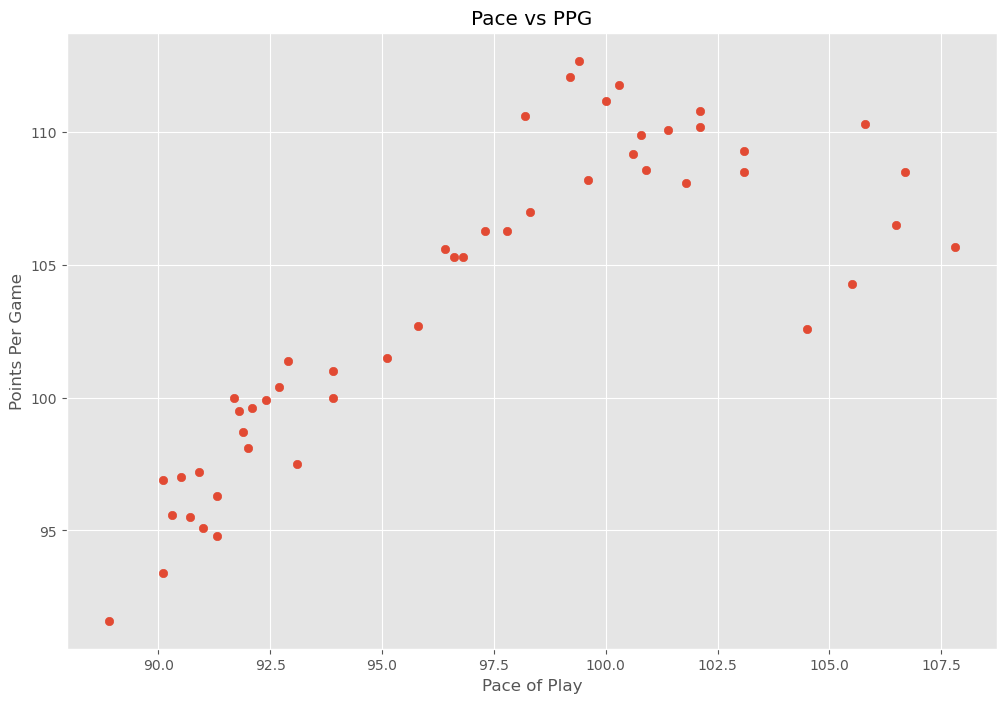

In [23]:
#Checking correlation between pace and the 5 different major statistics
#Start with scatter plot between pace and ppg


plt.scatter(x=statistical_correlation['pace'], y=statistical_correlation['pts'])


plt.title('Pace vs PPG')

plt.xlabel('Pace of Play')

plt.ylabel('Points Per Game')

plt.show()

<AxesSubplot:xlabel='pace', ylabel='pts'>

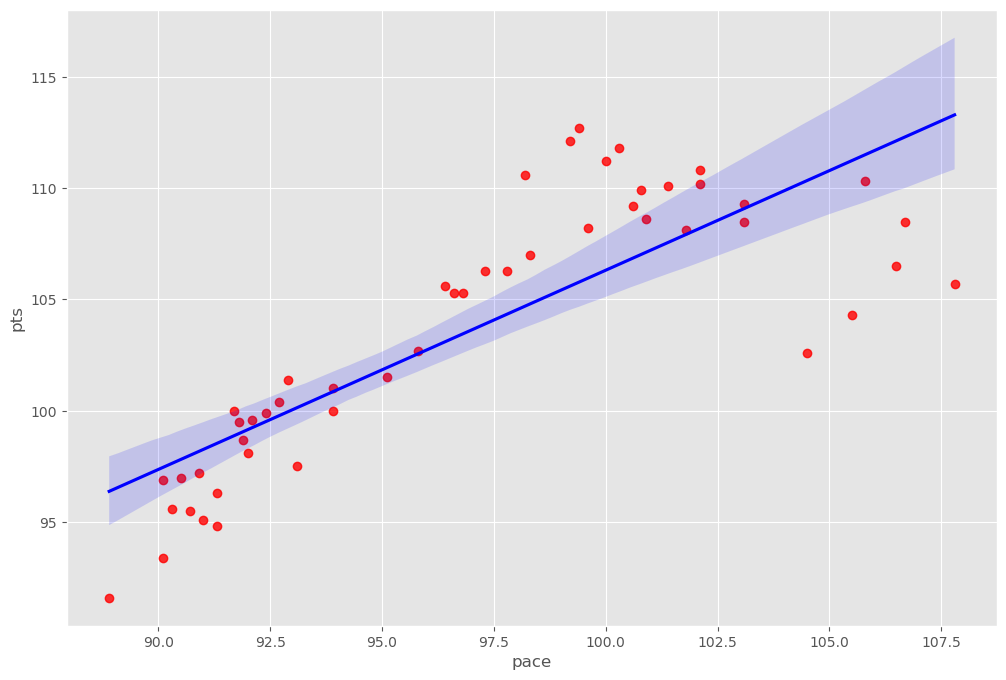

In [24]:
#Plot pace vs ppg using Seaborn

sns.regplot(x='pace', y='pts', data = statistical_correlation, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [25]:
statistical_correlation.corr()

,season,pts,trb,ast,stl,blk,pace
season,1.000000,0.009307,-0.732936,0.081814,-0.871685,-0.346977,-0.596436
pts,0.009307,1.000000,0.397755,0.580298,0.381532,0.266100,0.820155
trb,-0.732936,0.397755,1.000000,-0.215825,0.587774,-0.091091,0.892707
ast,0.081814,0.580298,-0.215825,1.000000,0.654929,0.527709,0.815121
stl,-0.871685,0.381532,0.587774,0.654929,1.000000,0.448932,0.681187
blk,-0.346977,0.266100,-0.091091,0.527709,0.448932,1.000000,0.143872
pace,-0.596436,0.820155,0.892707,0.815121,0.681187,0.143872,1.000000


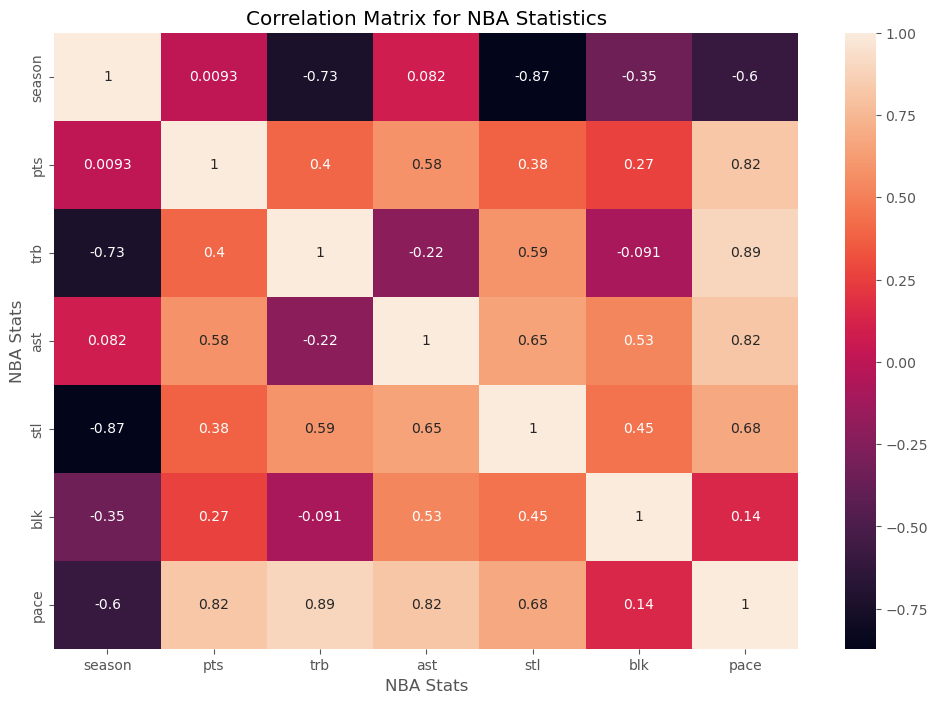

In [26]:
correlation_matrix = statistical_correlation.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for NBA Statistics')

plt.xlabel('NBA Stats')

plt.ylabel('NBA Stats')

plt.show()

In [27]:
#We can see that Points, Rebounds, Assists, and Steals all have strong positive correlation with pace.
#As pace increases we can also expect these statistics to increase while blocks does not have a correlation
#We will adjust those stats to do historical statistical analysis with players from differing eras

#Print all players on the nba 75 team

temp = player_stats.loc[player_stats.nba_75_team==1, ['player']]
temp.head()

,player
2,kareem abdul-jabbar
68,ray allen
116,giannis antetokounmpo
119,carmelo anthony
129,tiny archibald


In [63]:
#New database to compare players in the nba 75 team actual stats to their adjusted stats.

pd.set_option('display.max_rows', None)
top_75_adjusted = pd.merge(result, temp, how='inner', on='player')
top_75_adjusted = top_75_adjusted.drop(49)
top_75_adjusted = top_75_adjusted.drop('player_id', axis=1)
top_75_adjusted

,player,adjusted_scoring_per_game,adjusted_rebounds_per_game,adjusted_assists_per_game,points_per_game,rebounds_per_game,assists_per_game
0,george mikan,19.017976,13.158588,2.528829,21.466667,12.920000,2.616667
1,dolph schayes,15.768229,10.109213,2.574141,17.733333,11.657143,3.026667
2,bill sharman,16.199283,3.590285,2.765479,17.500000,3.918182,2.863636
3,bob cousy,15.619044,4.331198,6.454597,17.285714,4.928571,7.114286
4,paul arizin,20.060329,7.337503,2.020131,22.790000,8.640000,2.330000
5,bob pettit,21.783503,13.387931,2.459731,26.181818,16.109091,2.963636
6,bill russell,12.384292,18.378895,3.419474,15.115385,22.376923,4.161538
7,sam jones,14.270480,3.998852,2.051741,17.400000,4.900000,2.508333
8,elgin baylor,20.738155,10.314386,3.251697,25.278571,12.592857,3.942857
9,hal greer,15.472604,4.113532,3.318910,18.646667,4.966667,3.973333


In [64]:
top_75_adjusted = top_75_adjusted[['player', 'adjusted_scoring_per_game', 'points_per_game', 'adjusted_rebounds_per_game', 
                                   'rebounds_per_game', 'adjusted_assists_per_game', 'assists_per_game']]
top_75_adjusted.head()

,player,adjusted_scoring_per_game,points_per_game,adjusted_rebounds_per_game,rebounds_per_game,adjusted_assists_per_game,assists_per_game
0,george mikan,19.017976,21.466667,13.158588,12.920000,2.528829,2.616667
1,dolph schayes,15.768229,17.733333,10.109213,11.657143,2.574141,3.026667
2,bill sharman,16.199283,17.500000,3.590285,3.918182,2.765479,2.863636
3,bob cousy,15.619044,17.285714,4.331198,4.928571,6.454597,7.114286
4,paul arizin,20.060329,22.790000,7.337503,8.640000,2.020131,2.330000


In [70]:
top_75_adjusted.loc[top_75_adjusted['player'] == 'kobe bryant']

,player,adjusted_scoring_per_game,points_per_game,adjusted_rebounds_per_game,rebounds_per_game,adjusted_assists_per_game,assists_per_game
59,kobe bryant,26.400435,24.2,5.669883,5.2,5.186137,4.76
